<a href="https://colab.research.google.com/github/ThitipongKan/DPDM65/blob/main/final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import package

In [1]:
#import เพื่อดึง package data ตั้งชื่อเป็น pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics

#Import data

In [2]:
from google.colab import drive #เชื่อม google drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/DPDM65/train.csv')

In [4]:
train_df.head()

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,NaN,0.0,0.0,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,2.0,1.0,208.0,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,3.0,145.0,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,3.0,114.0,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN


In [5]:
train_df.describe()

,Unnamed: 0,land wide(m),zip_code,number_of_rai,number_of_va,construct_year,model
count,2725.000000,315.000000,1.741000e+03,2725.000000,2725.000000,0.0,0.0
mean,1362.000000,55.456159,4.635122e+06,3.561101,44.054606,NaN,NaN
std,786.784066,75.585414,1.355348e+08,15.905963,58.956727,NaN,NaN
min,0.000000,4.000000,4.000000e+04,0.000000,0.000000,NaN,NaN
25%,681.000000,12.000000,4.000000e+04,0.000000,5.000000,NaN,NaN
50%,1362.000000,27.500000,4.000000e+04,0.000000,35.000000,NaN,NaN
75%,2043.000000,65.000000,4.013000e+04,0.000000,66.000000,NaN,NaN
max,2724.000000,420.000000,4.000040e+09,458.000000,1656.000000,NaN,NaN


In [6]:
train_df.dtypes

Unnamed: 0              int64
id                     object
project_name           object
company                object
province               object
district               object
sub_district           object
property_type          object
home improvement       object
renovate               object
public utility         object
land type              object
land wide(m)          float64
land long(m)           object
topsoil                object
corner                 object
zip_code              float64
zone                   object
alley                  object
street                 object
latitude               object
longitude              object
number_of_rai         float64
number_of_ngan         object
number_of_va          float64
construct_year        float64
model                 float64
sell_price             object
number_of_unit         object
number_of_story        object
number_of_bedroom      object
number_of_bathroom     object
number_of_parking      object
usable_are

In [7]:
train_df.isnull().any()

Unnamed: 0            False
id                    False
project_name           True
company                True
province               True
district               True
sub_district           True
property_type         False
home improvement       True
renovate               True
public utility         True
land type              True
land wide(m)           True
land long(m)           True
topsoil                True
corner                 True
zip_code               True
zone                   True
alley                  True
street                 True
latitude               True
longitude              True
number_of_rai         False
number_of_ngan        False
number_of_va          False
construct_year         True
model                  True
sell_price             True
number_of_unit         True
number_of_story        True
number_of_bedroom      True
number_of_bathroom     True
number_of_parking      True
usable_area            True
central_cost           True
direction           

#จัดการค่าในตารางเบื้องต้น

##ทำการแก้ตัวแปรที่มีปัญหา

In [8]:
train_df['sell_price'] = pd.to_numeric(train_df['sell_price'],errors='coerce')

In [9]:
train_df['number_of_ngan'] = pd.to_numeric(train_df['number_of_ngan'],errors='coerce')

In [10]:
train_df['number_of_unit'] = pd.to_numeric(train_df['number_of_unit'],errors='coerce')
train_df['number_of_story'] = pd.to_numeric(train_df['number_of_story'],errors='coerce')
train_df['number_of_bedroom'] = pd.to_numeric(train_df['number_of_bedroom'],errors='coerce')
train_df['number_of_bathroom'] = pd.to_numeric(train_df['number_of_bathroom'],errors='coerce')
train_df['number_of_parking'] = pd.to_numeric(train_df['number_of_parking'],errors='coerce')
train_df['usable_area'] = pd.to_numeric(train_df['usable_area'],errors='coerce')
train_df['land long(m)'] = pd.to_numeric(train_df['land long(m)'],errors='coerce')

In [11]:
train_df.describe()

,Unnamed: 0,land wide(m),land long(m),zip_code,number_of_rai,number_of_ngan,number_of_va,construct_year,model,sell_price,number_of_unit,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area
count,2725.000000,315.000000,251.000000,1.741000e+03,2725.000000,2724.000000,2725.000000,0.0,0.0,2.715000e+03,8.00000,1162.000000,1866.000000,1613.000000,1408.000000,1807.000000
mean,1362.000000,55.456159,101.519163,4.635122e+06,3.561101,0.698238,44.054606,NaN,NaN,2.837311e+07,187.00000,1.819277,1.587353,1.463732,1.240057,658.507853
std,786.784066,75.585414,118.978390,1.355348e+08,15.905963,4.361887,58.956727,NaN,NaN,7.713639e+08,140.87786,2.143345,2.253417,1.489652,8.321749,8553.396424
min,0.000000,4.000000,2.000000,4.000000e+04,0.000000,0.000000,0.000000,NaN,NaN,0.000000e+00,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,681.000000,12.000000,20.000000,4.000000e+04,0.000000,0.000000,5.000000,NaN,NaN,1.450000e+06,64.25000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1362.000000,27.500000,41.000000,4.000000e+04,0.000000,0.000000,35.000000,NaN,NaN,2.590000e+06,170.50000,2.000000,1.000000,1.000000,0.000000,23.000000
75%,2043.000000,65.000000,150.000000,4.013000e+04,0.000000,1.000000,66.000000,NaN,NaN,4.900000e+06,336.50000,2.000000,3.000000,2.000000,2.000000,150.000000
max,2724.000000,420.000000,644.000000,4.000040e+09,458.000000,145.000000,1656.000000,NaN,NaN,4.000000e+10,347.00000,37.000000,40.000000,16.000000,288.000000,232000.000000


In [12]:
train_df.head()

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,NaN,0.0,0.0,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,2.0,1.0,208.0,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,3.0,145.0,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,3.0,114.0,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN


#ทำการเตรียมข้อมูลที่จะใช้ในการส้ราง model

In [13]:
train_df_cut=train_df.dropna(subset=['district'])

In [14]:
train_df_cut

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,NaN,0.0,0.0,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,2.0,1.0,208.0,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,3.0,145.0,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,3.0,114.0,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,2720,5130.0,เดอะ มอร์ ศรีจันทร์ ขอนแก่น,บริษัท วี ไอ พี แกรนด์ จำกัด,ขอนแก่น,เมืองขอนแก่น,พระลับ,บ้านเดี่ยว,no,no,...,6.0,5.0,0.0,1350.0,เหนือ,ตกแต่งครบ,NaN,NaN,NaN,NaN
2721,2721,30284P,NaN,NaN,ขอนแก่น,บ้านแฮด,บ้านแฮด,ที่ดิน,NaN,NaN,...,NaN,NaN,4625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2722,2722,6326.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านทุ่ม,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN
2723,2723,6045.0,กันยารัตน์ การ์เด้นวิว รีสอร์ท,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN


## ตัดข้อมูลที่ไม่ได้ใช้พร้อมเปลี่ยนชื่อ

ข้อมูลรวมทั้งเชิงปริมาณและเชิงคุณภาพ

In [15]:
train_df1=train_df_cut.iloc[:,[False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,True,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False]]

In [16]:
train_df1.describe()

,land wide(m),land long(m),number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_unit,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area
count,314.000000,250.000000,2721.000000,2720.000000,2721.000000,2.713000e+03,8.00000,1162.000000,1866.000000,1613.000000,1408.000000,1806.000000
mean,54.827038,100.725240,3.549063,0.697794,44.082617,2.826654e+07,187.00000,1.819277,1.587353,1.463732,1.240057,656.369707
std,74.875461,118.548993,15.897485,4.364910,58.973378,7.716245e+08,140.87786,2.143345,2.253417,1.489652,8.321749,8555.282402
min,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,20.000000,0.000000,0.000000,5.000000,1.450000e+06,64.25000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,27.250000,41.000000,0.000000,0.000000,35.000000,2.590000e+06,170.50000,2.000000,1.000000,1.000000,0.000000,23.000000
75%,64.750000,149.500000,0.000000,1.000000,66.000000,4.900000e+06,336.50000,2.000000,3.000000,2.000000,2.000000,150.000000
max,420.000000,644.000000,458.000000,145.000000,1656.000000,4.000000e+10,347.00000,37.000000,40.000000,16.000000,288.000000,232000.000000


In [17]:
train_df11=train_df_cut.iloc[:,[False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False]]

In [18]:
train_df11

,number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area
0,0.0,0.0,98.4,2860000.0,NaN,0.0,NaN,0.0,0.0
1,3.0,0.0,72.0,17490000.0,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,52.0,2800000.0,1.0,3.0,2.0,1.0,208.0
3,0.0,0.0,40.0,2600000.0,2.0,3.0,3.0,3.0,145.0
4,0.0,0.0,50.0,1490000.0,1.0,2.0,2.0,3.0,114.0
...,...,...,...,...,...,...,...,...,...
2720,0.0,0.0,135.0,12500000.0,2.0,5.0,6.0,5.0,0.0
2721,11.0,2.0,25.0,8671875.0,NaN,NaN,NaN,NaN,4625.0
2722,0.0,0.0,58.0,1400000.0,NaN,0.0,0.0,0.0,0.0
2723,0.0,0.0,78.0,2915000.0,NaN,0.0,0.0,0.0,0.0


In [19]:
train_df1

,property_type,land wide(m),land long(m),number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_unit,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area
0,บ้านเดี่ยว,NaN,NaN,0.0,0.0,98.4,2860000.0,NaN,NaN,0.0,NaN,0.0,0.0
1,ที่ดิน,24.0,69.0,3.0,0.0,72.0,17490000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,บ้านเดี่ยว,NaN,NaN,0.0,0.0,52.0,2800000.0,NaN,1.0,3.0,2.0,1.0,208.0
3,บ้านเดี่ยว,NaN,NaN,0.0,0.0,40.0,2600000.0,NaN,2.0,3.0,3.0,3.0,145.0
4,บ้านเดี่ยว,NaN,NaN,0.0,0.0,50.0,1490000.0,NaN,1.0,2.0,2.0,3.0,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,บ้านเดี่ยว,NaN,NaN,0.0,0.0,135.0,12500000.0,NaN,2.0,5.0,6.0,5.0,0.0
2721,ที่ดิน,NaN,NaN,11.0,2.0,25.0,8671875.0,NaN,NaN,NaN,NaN,NaN,4625.0
2722,บ้านเดี่ยว,NaN,NaN,0.0,0.0,58.0,1400000.0,NaN,NaN,0.0,0.0,0.0,0.0
2723,บ้านเดี่ยว,NaN,NaN,0.0,0.0,78.0,2915000.0,NaN,NaN,0.0,0.0,0.0,0.0


#ดูเซตของข้อมูลเชิงคุณภาพที่จะใช้ในงานนี้

##property_type

In [20]:
set(train_df1['property_type'])

{'คอนโด',
 'ทาวน์โฮม',
 'ที่ดิน',
 'บ้านเดี่ยว',
 'บ้านแฝด',
 'อาคารพาณิชย์/สำนักงาน'}

##district

In [21]:
set(train_df['district'])

{nan,
 'กระนวน',
 'ชนบท',
 'ชุมแพ',
 'ชุุมแพ',
 'ซำสูง',
 'ท่าพระ',
 'น้ำพอง',
 'บ้านทุ่ม',
 'บ้านฝาง',
 'บ้านแฮด',
 'บ้านไผ่',
 'พระยืน',
 'พล',
 'ภูผาม่าน',
 'ภูเวียง',
 'มัญจาคีรี',
 'สีชมพู',
 'หนองนาคำ',
 'หนองสองห้อง',
 'หนองเรือ',
 'หนอนนาคำ',
 'อุบลรัตน์',
 'เขาสวนกวาง',
 'เปือยน้อย',
 'เมืองขอนแก่น',
 'เมืองพล',
 'เวียงเก่า',
 'แวงน้อย',
 'แวงใหญ่',
 'โคกโพธิ์ไชย',
 'โนนศิลา',
 'ในเมือง'}

##furniture

In [22]:
set(train_df['furniture'])

{'- เครื่องทำน้ำอุ่น 2ตัว\n- มุ้งลวด ทั้งหลัง\n- เหล็กดัด ทั้งหลัง\n- ม่าน มู่ลี่ทั้งหลัง\n- กล้องวงจรปิด 8 ช่อง\n- แอร์ 2ตัว\n- ปั๊มน้ำ 1ตัว',
 nan,
 'tv\nrefrigerator\n3.5 feet bed\n3.5 feet mattress and blanket\nAir conditioner\nmicrowave\nPigtail mattress',
 'yes',
 'ครบครัน',
 'ครบชุด',
 'ครื่องปรับอากาศ 2 เครื่องในห้องนอน\nถังเก็บน้ำและปั๊มน้ำ',
 'ตกแต่งครบ',
 'ตู้เย็น เครื่องดูดควัน เตาไฟฟ้า แทงค์และปั้มน้ำ เครื่องทำน้ำอุ่น กล้องวงจรปิด\nจานดาวเทียม',
 'ตู้เย็นใหม่ ชุดโต๊ะทานข้าวกระจกขนาดหกที่นั่ง และ เก้าอี้หกชุด แอร์ และ ปั๊มน้ำ',
 'ทีวี,โซฟา,เตียงพร้อมที่นอน ,ตู้เสื้อผ้า ,โต๊ะ,เคาน์เตอร์ครัว,โต๊ะอาหาร,เครื่องปรับอากาศ 2 เครื่อง\nเครื่องทำน้ำอุ่น 1 เครื่อง เครื่องซักผ้า 1 เครื่อง',
 'บางส่วน',
 'บางส่วน ตู้เย็น เครื่องซักผ้า และแอร์ 3 ตัว',
 'บาวส่วน',
 'พร้อมเฟอร์นิเจอร์ เตียง+ที่นอน ตู้ พัดลม เครื่องปรับอากาศ 2 เครื่อง\nเครื่องทำน้ำอุ่น 2 ชุด กล้องวงจรปิด 4 ตัว\n',
 'พร้อมเฟอร์นิเจอร์ โซฟา โต๊ะ เก้าอี้ เตียง ที่นอน ตู้ ผ้าม่าน แอร์ เครื่องทำน้ำอุ่น',
 'พร้อมเฟอร์นิเจอร์โต๊ะ 

#จัดการกับข้อมูลเชิงคุณภาพ

แยกจัดการ idstrict

In [23]:
train_df2 = train_df['district']

In [24]:
train_df2

0       เมืองขอนแก่น
1       เมืองขอนแก่น
2       เมืองขอนแก่น
3       เมืองขอนแก่น
4       เมืองขอนแก่น
            ...     
2720    เมืองขอนแก่น
2721         บ้านแฮด
2722    เมืองขอนแก่น
2723    เมืองขอนแก่น
2724              พล
Name: district, Length: 2725, dtype: object

In [25]:
train_df2[train_df2!='เมืองขอนแก่น']='บ้านนอก'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
train_df2

0       เมืองขอนแก่น
1       เมืองขอนแก่น
2       เมืองขอนแก่น
3       เมืองขอนแก่น
4       เมืองขอนแก่น
            ...     
2720    เมืองขอนแก่น
2721         บ้านนอก
2722    เมืองขอนแก่น
2723    เมืองขอนแก่น
2724         บ้านนอก
Name: district, Length: 2725, dtype: object

แยกจัดการ furniture

In [27]:
train_df3 = train_df['furniture']

In [28]:
train_df3

0                                                 ไม่ระบุ
1                                                 ไม่ระบุ
2       ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...
3                                                   ไม่มี
4                                                 ไม่ระบุ
                              ...                        
2720                                            ตกแต่งครบ
2721                                                  NaN
2722                                              ไม่ระบุ
2723                                              ไม่ระบุ
2724                                              ไม่ระบุ
Name: furniture, Length: 2725, dtype: object

In [29]:
train_df3[train_df3=='ไม่มีเฟอร์นิเจอร์']='ไม่มี'
train_df3[train_df3=='ไม่มีเฟอร์นิเจอร์. เฟอร์นิเจอร์นำเข้าสามารถเจรจาแยกกันโดยผู้ซื้อ']='ไม่มี'
train_df3[train_df3=='ไม่รวมตู้เย็น,ทีวี,เครื่องซักผ้า']='ไม่มี'
train_df3[train_df3=='ไม่รวมเฟอร์นิเจอร์']='ไม่มี'
train_df3[train_df3=='nan']='ไม่ระบุ'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [30]:
train_df3[train_df3=='nan']='ไม่ระบุ'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
train_df3[(train_df3!='ไม่มี')&(train_df3!='ไม่ระบุ')]='มี'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
train_df3

0       ไม่ระบุ
1       ไม่ระบุ
2            มี
3         ไม่มี
4       ไม่ระบุ
         ...   
2720         มี
2721         มี
2722    ไม่ระบุ
2723    ไม่ระบุ
2724    ไม่ระบุ
Name: furniture, Length: 2725, dtype: object

In [33]:
train_df1.shape

(2721, 13)

In [34]:
train_df1.head()

,property_type,land wide(m),land long(m),number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_unit,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area
0,บ้านเดี่ยว,NaN,NaN,0.0,0.0,98.4,2860000.0,NaN,NaN,0.0,NaN,0.0,0.0
1,ที่ดิน,24.0,69.0,3.0,0.0,72.0,17490000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,บ้านเดี่ยว,NaN,NaN,0.0,0.0,52.0,2800000.0,NaN,1.0,3.0,2.0,1.0,208.0
3,บ้านเดี่ยว,NaN,NaN,0.0,0.0,40.0,2600000.0,NaN,2.0,3.0,3.0,3.0,145.0
4,บ้านเดี่ยว,NaN,NaN,0.0,0.0,50.0,1490000.0,NaN,1.0,2.0,2.0,3.0,114.0


วิธีการลบ column

In [35]:
train_df2.shape

(2725,)

In [36]:
train_df2.shape

(2725,)

In [37]:
train_df_clean = pd.concat([train_df1,train_df2,train_df3],axis=1) #ข้อมูลรวมทั้งเชิงปริมาณและคุณภาพ

In [38]:
train_df_clean

,property_type,land wide(m),land long(m),number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_unit,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area,district,furniture
0,บ้านเดี่ยว,NaN,NaN,0.0,0.0,98.4,2860000.0,NaN,NaN,0.0,NaN,0.0,0.0,เมืองขอนแก่น,ไม่ระบุ
1,ที่ดิน,24.0,69.0,3.0,0.0,72.0,17490000.0,NaN,NaN,NaN,NaN,NaN,NaN,เมืองขอนแก่น,ไม่ระบุ
2,บ้านเดี่ยว,NaN,NaN,0.0,0.0,52.0,2800000.0,NaN,1.0,3.0,2.0,1.0,208.0,เมืองขอนแก่น,มี
3,บ้านเดี่ยว,NaN,NaN,0.0,0.0,40.0,2600000.0,NaN,2.0,3.0,3.0,3.0,145.0,เมืองขอนแก่น,ไม่มี
4,บ้านเดี่ยว,NaN,NaN,0.0,0.0,50.0,1490000.0,NaN,1.0,2.0,2.0,3.0,114.0,เมืองขอนแก่น,ไม่ระบุ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,บ้านเดี่ยว,NaN,NaN,0.0,0.0,135.0,12500000.0,NaN,2.0,5.0,6.0,5.0,0.0,เมืองขอนแก่น,มี
2721,ที่ดิน,NaN,NaN,11.0,2.0,25.0,8671875.0,NaN,NaN,NaN,NaN,NaN,4625.0,บ้านนอก,มี
2722,บ้านเดี่ยว,NaN,NaN,0.0,0.0,58.0,1400000.0,NaN,NaN,0.0,0.0,0.0,0.0,เมืองขอนแก่น,ไม่ระบุ
2723,บ้านเดี่ยว,NaN,NaN,0.0,0.0,78.0,2915000.0,NaN,NaN,0.0,0.0,0.0,0.0,เมืองขอนแก่น,ไม่ระบุ


In [39]:
train_df11.corr(method = 'pearson')

,number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area
number_of_rai,1.000000,0.280728,-0.020567,0.062657,-0.026279,0.031943,0.033501,0.009666,0.883580
number_of_ngan,0.280728,1.000000,0.044561,0.000756,-0.042835,-0.039640,0.009264,-0.014232,0.978778
number_of_va,-0.020567,0.044561,1.000000,0.016115,-0.030907,0.055254,-0.024353,-0.017408,0.043833
sell_price,0.062657,0.000756,0.016115,1.000000,0.050136,0.304783,0.308107,0.052631,0.366165
number_of_story,-0.026279,-0.042835,-0.030907,0.050136,1.000000,0.040998,0.091760,0.060434,0.027716
number_of_bedroom,0.031943,-0.039640,0.055254,0.304783,0.040998,1.000000,0.903177,0.144806,0.232319
number_of_bathroom,0.033501,0.009264,-0.024353,0.308107,0.091760,0.903177,1.000000,0.126730,0.220844
number_of_parking,0.009666,-0.014232,-0.017408,0.052631,0.060434,0.144806,0.126730,1.000000,0.050179
usable_area,0.883580,0.978778,0.043833,0.366165,0.027716,0.232319,0.220844,0.050179,1.000000


เนื่องจากค่า cor(usable_area,number_of_rai) = 0.88358,	cor(usable_area,number_of_ngan) = 0.978778	
,cor(number_of_bedroom,number_of_bathroom	) = 0.978778

In [40]:
train_df11.head()

,number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area
0,0.0,0.0,98.4,2860000.0,NaN,0.0,NaN,0.0,0.0
1,3.0,0.0,72.0,17490000.0,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,52.0,2800000.0,1.0,3.0,2.0,1.0,208.0
3,0.0,0.0,40.0,2600000.0,2.0,3.0,3.0,3.0,145.0
4,0.0,0.0,50.0,1490000.0,1.0,2.0,2.0,3.0,114.0


In [41]:
train_df111=train_df11.iloc[:,[True,True,True,True,True,True,False,True,False]]

In [42]:
train_df111

,number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_story,number_of_bedroom,number_of_parking
0,0.0,0.0,98.4,2860000.0,NaN,0.0,0.0
1,3.0,0.0,72.0,17490000.0,NaN,NaN,NaN
2,0.0,0.0,52.0,2800000.0,1.0,3.0,1.0
3,0.0,0.0,40.0,2600000.0,2.0,3.0,3.0
4,0.0,0.0,50.0,1490000.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...
2720,0.0,0.0,135.0,12500000.0,2.0,5.0,5.0
2721,11.0,2.0,25.0,8671875.0,NaN,NaN,NaN
2722,0.0,0.0,58.0,1400000.0,NaN,0.0,0.0
2723,0.0,0.0,78.0,2915000.0,NaN,0.0,0.0


In [43]:
train_df111.corr(method = 'pearson')

,number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_story,number_of_bedroom,number_of_parking
number_of_rai,1.000000,0.280728,-0.020567,0.062657,-0.026279,0.031943,0.009666
number_of_ngan,0.280728,1.000000,0.044561,0.000756,-0.042835,-0.039640,-0.014232
number_of_va,-0.020567,0.044561,1.000000,0.016115,-0.030907,0.055254,-0.017408
sell_price,0.062657,0.000756,0.016115,1.000000,0.050136,0.304783,0.052631
number_of_story,-0.026279,-0.042835,-0.030907,0.050136,1.000000,0.040998,0.060434
number_of_bedroom,0.031943,-0.039640,0.055254,0.304783,0.040998,1.000000,0.144806
number_of_parking,0.009666,-0.014232,-0.017408,0.052631,0.060434,0.144806,1.000000


In [44]:
train_df111_clean = pd.concat([train_df111,train_df2,train_df3],axis=1)

In [45]:
train_df111_clean

,number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_story,number_of_bedroom,number_of_parking,district,furniture
0,0.0,0.0,98.4,2860000.0,NaN,0.0,0.0,เมืองขอนแก่น,ไม่ระบุ
1,3.0,0.0,72.0,17490000.0,NaN,NaN,NaN,เมืองขอนแก่น,ไม่ระบุ
2,0.0,0.0,52.0,2800000.0,1.0,3.0,1.0,เมืองขอนแก่น,มี
3,0.0,0.0,40.0,2600000.0,2.0,3.0,3.0,เมืองขอนแก่น,ไม่มี
4,0.0,0.0,50.0,1490000.0,1.0,2.0,3.0,เมืองขอนแก่น,ไม่ระบุ
...,...,...,...,...,...,...,...,...,...
2720,0.0,0.0,135.0,12500000.0,2.0,5.0,5.0,เมืองขอนแก่น,มี
2721,11.0,2.0,25.0,8671875.0,NaN,NaN,NaN,บ้านนอก,มี
2722,0.0,0.0,58.0,1400000.0,NaN,0.0,0.0,เมืองขอนแก่น,ไม่ระบุ
2723,0.0,0.0,78.0,2915000.0,NaN,0.0,0.0,เมืองขอนแก่น,ไม่ระบุ


In [46]:
train_df111_clean

,number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_story,number_of_bedroom,number_of_parking,district,furniture
0,0.0,0.0,98.4,2860000.0,NaN,0.0,0.0,เมืองขอนแก่น,ไม่ระบุ
1,3.0,0.0,72.0,17490000.0,NaN,NaN,NaN,เมืองขอนแก่น,ไม่ระบุ
2,0.0,0.0,52.0,2800000.0,1.0,3.0,1.0,เมืองขอนแก่น,มี
3,0.0,0.0,40.0,2600000.0,2.0,3.0,3.0,เมืองขอนแก่น,ไม่มี
4,0.0,0.0,50.0,1490000.0,1.0,2.0,3.0,เมืองขอนแก่น,ไม่ระบุ
...,...,...,...,...,...,...,...,...,...
2720,0.0,0.0,135.0,12500000.0,2.0,5.0,5.0,เมืองขอนแก่น,มี
2721,11.0,2.0,25.0,8671875.0,NaN,NaN,NaN,บ้านนอก,มี
2722,0.0,0.0,58.0,1400000.0,NaN,0.0,0.0,เมืองขอนแก่น,ไม่ระบุ
2723,0.0,0.0,78.0,2915000.0,NaN,0.0,0.0,เมืองขอนแก่น,ไม่ระบุ


In [47]:
train_df111_clean_dummies=pd.get_dummies(train_df111_clean)

In [48]:
train_df4 = train_df11['sell_price']

ข้อมูลเชิงปริมาณ train_df111
ข้อมูลเชิงคุณภาพที่มีการทำดัมมี้ train_df111_clean_dummies

Independent set = 

In [49]:
train_df4

0        2860000.0
1       17490000.0
2        2800000.0
3        2600000.0
4        1490000.0
           ...    
2720    12500000.0
2721     8671875.0
2722     1400000.0
2723     2915000.0
2724     1045000.0
Name: sell_price, Length: 2721, dtype: float64

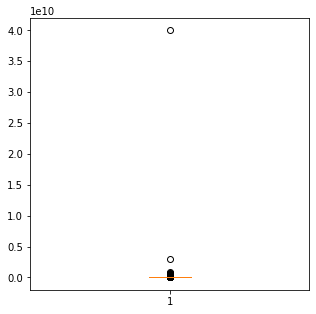

In [50]:
fig = plt.figure(figsize =(5, 5))
# Creating plot
plt.boxplot(train_df4.dropna())
 
# show plot
plt.show()

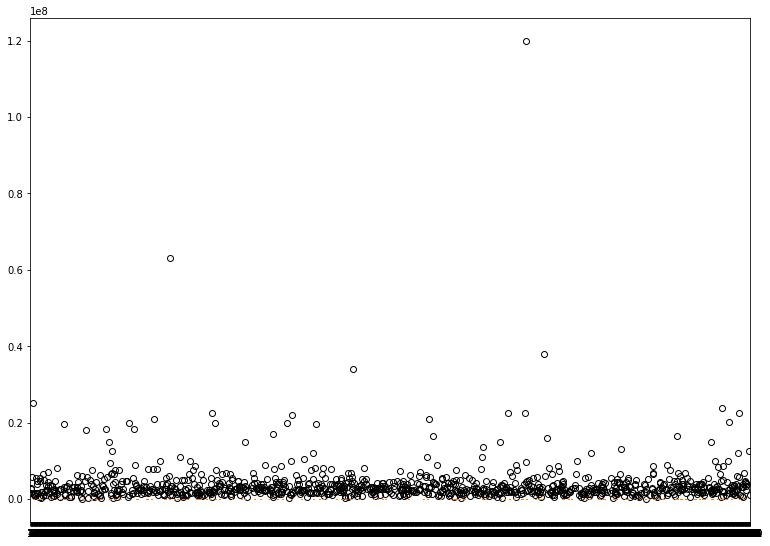

In [51]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(train_df111)
 
# show plot
plt.show()

In [52]:
train_df1111=train_df111_clean.loc[train_df111_clean['sell_price']!=max(train_df111_clean['sell_price'])]
train_df1111=train_df1111.loc[train_df1111['sell_price']!=max(train_df1111['sell_price'])]

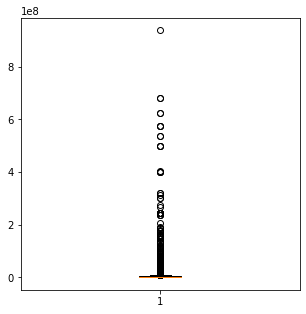

In [53]:
fig = plt.figure(figsize =(5, 5))
# Creating plot
plt.boxplot(train_df1111['sell_price'].dropna())
 
# show plot
plt.show()

In [54]:
train_df1111

,number_of_rai,number_of_ngan,number_of_va,sell_price,number_of_story,number_of_bedroom,number_of_parking,district,furniture
0,0.0,0.0,98.4,2860000.0,NaN,0.0,0.0,เมืองขอนแก่น,ไม่ระบุ
1,3.0,0.0,72.0,17490000.0,NaN,NaN,NaN,เมืองขอนแก่น,ไม่ระบุ
2,0.0,0.0,52.0,2800000.0,1.0,3.0,1.0,เมืองขอนแก่น,มี
3,0.0,0.0,40.0,2600000.0,2.0,3.0,3.0,เมืองขอนแก่น,ไม่มี
4,0.0,0.0,50.0,1490000.0,1.0,2.0,3.0,เมืองขอนแก่น,ไม่ระบุ
...,...,...,...,...,...,...,...,...,...
2720,0.0,0.0,135.0,12500000.0,2.0,5.0,5.0,เมืองขอนแก่น,มี
2721,11.0,2.0,25.0,8671875.0,NaN,NaN,NaN,บ้านนอก,มี
2722,0.0,0.0,58.0,1400000.0,NaN,0.0,0.0,เมืองขอนแก่น,ไม่ระบุ
2723,0.0,0.0,78.0,2915000.0,NaN,0.0,0.0,เมืองขอนแก่น,ไม่ระบุ


In [59]:
train_df1111.dropna

<bound method DataFrame.dropna of       number_of_rai  number_of_ngan  number_of_va  sell_price  \
0               0.0             0.0          98.4   2860000.0   
1               3.0             0.0          72.0  17490000.0   
2               0.0             0.0          52.0   2800000.0   
3               0.0             0.0          40.0   2600000.0   
4               0.0             0.0          50.0   1490000.0   
...             ...             ...           ...         ...   
2720            0.0             0.0         135.0  12500000.0   
2721           11.0             2.0          25.0   8671875.0   
2722            0.0             0.0          58.0   1400000.0   
2723            0.0             0.0          78.0   2915000.0   
2724            0.0             0.0          32.0   1045000.0   

      number_of_story  number_of_bedroom  number_of_parking      district  \
0                 NaN                0.0                0.0  เมืองขอนแก่น   
1                 NaN          

In [55]:
data_area = train_df1111['number_of_rai']*400+train_df1111['number_of_ngan']*100+train_df1111['number_of_va']

In [56]:
data_area

0         98.4
1       1272.0
2         52.0
3         40.0
4         50.0
         ...  
2720     135.0
2721    4625.0
2722      58.0
2723      78.0
2724      32.0
Length: 2723, dtype: float64

In [57]:
train_df1111['sell_price']

0        2860000.0
1       17490000.0
2        2800000.0
3        2600000.0
4        1490000.0
           ...    
2720    12500000.0
2721     8671875.0
2722     1400000.0
2723     2915000.0
2724     1045000.0
Name: sell_price, Length: 2723, dtype: float64

In [60]:
# defining feature matrix(X) and response vector(y)
X = data_area
y = train_df1111['sell_price']

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    random_state=1)
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)  
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)

ValueError: ignored